<Body>   
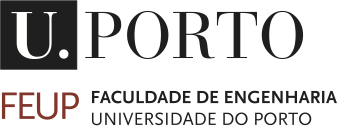   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**Professors:**

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**M. Rosário Pinho** (mrpinho@fe.up.pt)

FEUP, Feb. 2024

---


# **Project - Part 1**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions. At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **April 1st** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.


---



In [ ]:
# To make a nice pdf file of this file, you have to do the following:
# - upload your file to print into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "name_of_the_file.ipynb"
# Then just download the html file and print it to pdf!

# **Identification**

* **Group:** 6
* **Name:** Ana Margarida Lago Biltes Vieira Lopes
* **Student Number:** 202007318

* **Name:** Joana Sofia Pais Silva
* **Student Number:** 202006241

* **Name:** Tiago Marques Claro
* **Student Number:** 202006003

---




# An Autonomous Underwater Vehicle (AUV) model in the vertical plan


<Body>   
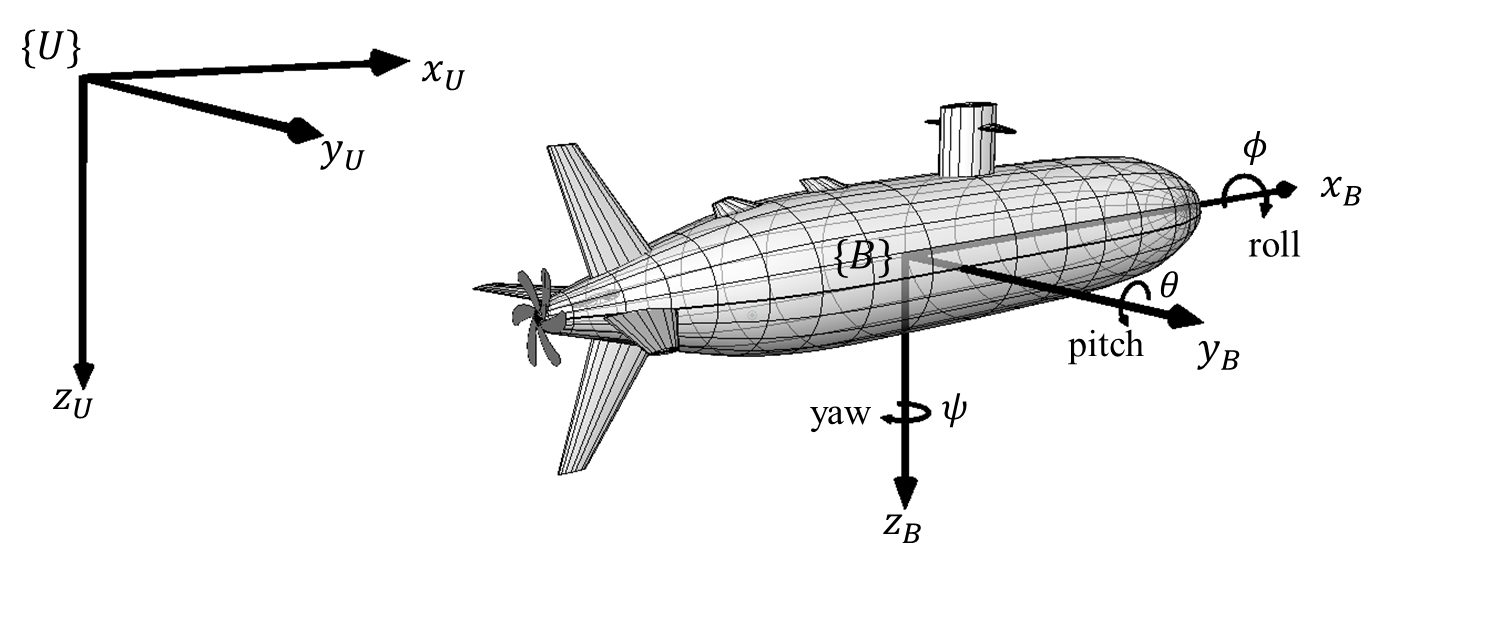

Fig. 1. Coordinate frames, position and orientation variables of an AUV.


Consider an Autonomous Underwater Vehicle (AUV) illustrated in Fig. 1 that can only generate force in $x_B$-direction by means of an actuator composed of an electric motor with a propeller coupled to the shaft.

In this work, the final goal is to design a tracking controller in the vertical plane so that that the vehicle will move according to a desired depth trajectory.


In the vertical plane, the kinematic equations take the form

\begin{align}
 \dot x &= u\cos \theta  + w\sin \theta  \\
 \dot z &=  - u\sin \theta  + w\cos \theta  \\
 \dot \theta  &= q
\end{align}

where $u$, $w$ and $q$ are the linear and angular velocities of the  vehicle, respectively, in surge ($x_B$), heave ($z_B$) and pitch ($\theta$) direction of the body-fixed coordinates $\{B\}$. The Cartesian coordinates of the vehicle's center of mass is denoted by $x$ and $z$, and $\theta$ is the pitch angle.

The simplified equations of motion for surge, heave, and pitch rate when there is no actuated force in $Z_B$ direction (that is, the vehicle is underactuated) yield

\begin{align}
{m_u}\dot u + {m_w}wq + {d_u}(u)u &= \tau_u \\
{m_w}\dot w - {m_u}uq + {d_w}(w)w &= 0 \\
{m_q}\dot q + {m_{uw}}uw + {d_q}(q)q - z_BB\sin\theta &= \tau_q
\end{align}

where $m_u=m-X_{\dot{u}}$, $m_w=m-Z_{\dot{w}}$, $m_q=I_y-M_{\dot q}$ and $m_{uw}=m_u-m_w$ are mass and hydrodynamic added mass terms, $B$ denotes the buoyancy, and the hydrodynamic damping effects are considered to be of the form

\begin{align}
d_u(u) &=-X_u-X_{u|u|}|u| \\
d_w(w) &=-Z_w-Z_{w|w|}|w| \\
d_q(q) &=-M_q-M_{q|q|}|q|
\end{align}


In the above equations, it is assumed that the AUV is neutrally buoyant and that the center of buoyancy can be expressed as $(x_B, y_B, z_B) = (0,0, z_B)$, where $z_B$ is the metacentric height.
The symbols $\tau_u$ and $\tau_q$ denote the actuated force in surge direction and  torque around the $y$-axis of the vehicle, respectively.



# **Part 1: Stability analysis**



We take the practical situation that there exist autopilots controllers in charge of tracking reference signals in $u$ and $q$. Thus, we consider at this stage that the actuation signals are $u$ and $q$.

**1.1** Show that the speed controller given by

\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}
\end{equation}

forces the AUV to move with a constant horizontal velocity $v_d$, that is, $\dot x = v_d$. Show also that in this case the equations of motion in the vertical plane of the AUV  reduces to

$\color{blue}{AUV\ model}$

\begin{align*}
\dot x &= v_d \\
\dot z &= - v_d \tan\theta + \frac{1}{\cos\theta}w \\
\dot w &=d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
\dot\theta &= q
\end{align*}

where $z$ is the vertical position (depth) of the AUV, $w$ is the linear velocity along the axis $z_B$ (*heave*), $\theta$ is the angle of *pitch*, and $q$ is the angular velocity around the axis $y_B$.


In the sequel, we will consider that system parameters have the following values (in appropriate units):
$v_d = 1$; $d_1= -3$; $d_2 = -12$, $\bar m = 0.9$

$\bf{1.1 : Answer}$

If:

\begin{equation}
	u = \frac{v_d - w\sin\theta}{\cos\theta}
\end{equation}

and

\begin{align}
	\dot x &= u\cos\theta + w\sin\theta \\
	\dot z &= -u\sin\theta + w\cos\theta \\
	\dot w &= \frac{m_uuq - d_w(w)w}{m_w} \\
	\dot\theta &= q
\end{align}

Then for $\dot x$ we have:

\begin{align}
	\dot x &= \frac{v_d - w\sin\theta}{\cos\theta}\cos\theta + w\sin\theta \\

	\dot x &= v_d - w\sin\theta + w\sin\theta \\

	\dot x &= v_d
\end{align}

This shows that the AUV moves with a constant horizontal velocity $v_d$ because no matter the value of $w$ or $\theta$, $\dot x$ will always be equal to $v_d$.

For $\dot z$ we have:

\begin{align}
	\dot z &= -\frac{v_d - w\sin\theta}{\cos\theta}\sin\theta + w\cos\theta \\

	\dot z &= -v_d\tan\theta + w\frac{1}{cos\theta} - w\cos\theta + w\cos\theta \\

	\dot z &= -v_d\tan\theta + w\frac{1}{cos\theta}
\end{align}

For $\dot w$ we have:

\begin{align}
	\dot w &= \frac{m_u(\frac{v_d - w\sin\theta}{\cos\theta})q - d_w(w)w}{m_w} \\

	\dot w &= \frac{m_u}{m_w}(\frac{v_d}{\cos\theta}-w\tan\theta)q - (-\frac{Z_w}{m_w}w-\frac{Z_{w|w|}|w|}{m_w}w) \\

	\dot w &= \frac{m_u}{m_w}(\frac{v_d}{\cos\theta}-w\tan\theta)q + d_1w + d_2|w|w \\
\end{align}

**1.2.**
Let $z_d$ be a given desired depth. Defining the state ${\bf x} = (z-z_d,w,\theta)^⊤$, input ${\bf u}=q$, output ${\bf y}=z-z_d$, write the system in state-space form and linearize it around the origin ${\bf x=0}$.

$\bf{1.2 : Answer}$


Considering the system in state-space form, with the speed controller actuation we have:

$$
\dot{x} = 
\begin{bmatrix}
\dot{z} - \dot{z_d}\\
\dot{w} \\
\dot{\theta}
\end{bmatrix}=
\begin{bmatrix}
- v_d \tan\theta + \frac{1}{\cos\theta}w \\
d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
q
\end{bmatrix}
=\begin{bmatrix}
f_1(x) \\
f_2(x) \\
f_3(x) 
\end{bmatrix}
$$

Linearization

$$
\dot{x} = A x + B u
$$

$$
\ A = \frac{\partial f}{\partial x}\Big|_{x=x_0, u=u_0}  
\ B = \frac{\partial f}{\partial u}\Big|_{x=x_0, u=u_0}
\ C = \frac{\partial h}{\partial x}\Big|_{x=x_0, u=u_0}
$$

We can write the linearized system : 
$$
A = \begin{bmatrix}
\frac{\partial f_1}{\partial (z-z_d)} & \frac{\partial f_1}{\partial w} & \frac{\partial f_1}{\partial \theta} \\
\frac{\partial f_2}{\partial (z-z_d)} & \frac{\partial f_2}{\partial w} & \frac{\partial f_2}{\partial \theta} \\
\frac{\partial f_3}{\partial (z-z_d)} & \frac{\partial f_3}{\partial w} & \frac{\partial f_3}{\partial \theta} \\
\end{bmatrix}_{x=x_0, u=u_0}
= \begin{bmatrix}
0 &  \frac{1}{\cos(\theta)} &  \frac{-v_d}{\cos^2(\theta)} + \frac{w\sin(\theta)}{\cos^2(\theta)}   \\
0 & d_1 + d_2|w|-\tan(\theta)q\bar m & \frac{\bar mqv_d\sin(\theta)}{\cos^2(\theta)} - \frac{wq}{\cos^2(\theta)}\\
0 & 0 & 0
\end{bmatrix}_{x=x_0, u=u_0} 
= \begin{bmatrix}
0 & 1 &  -1  \\
0 & -3 & 0\\
0 & 0 & 0
\end{bmatrix}
$$

$$
B = \begin{bmatrix}
\frac{\partial f_1}{\partial q} \\
\frac{\partial f_2}{\partial q} \\
\frac{\partial f_3}{\partial q} 
\end{bmatrix}_{x=x_0, u=u_0} =
\begin{bmatrix}
0 \\
\bar m v_d \\
1
\end{bmatrix}_{x=x_0, u=u_0} = 
\begin{bmatrix}
0 \\ 0.9 \\ 1
\end{bmatrix}
$$

$$
C = 
\begin{bmatrix}
1 & 0 & 0 
\end{bmatrix}
$$

**1.3.**
Analyze the stability of the origin ${\bf x = 0}$ with ${\bf u=0}$ of the linear and nonlinear system using the **Lyapunov indirect method**.

$\bf{1.3 : Answer}$

If $\bf x=\left[0, 0, 0\right]^T $ and $\bf u=0$ then the linearized system is:

$$
A = \begin{bmatrix}
\frac{\partial f_1}{\partial (z-z_d)} & \frac{\partial f_1}{\partial w} & \frac{\partial f_1}{\partial \theta} \\
\frac{\partial f_2}{\partial (z-z_d)} & \frac{\partial f_2}{\partial w} & \frac{\partial f_2}{\partial \theta} \\
\frac{\partial f_3}{\partial (z-z_d)} & \frac{\partial f_3}{\partial w} & \frac{\partial f_3}{\partial \theta} \\
\end{bmatrix}_{x=x_0, u=u_0}

= \begin{bmatrix}
0 & 1 & -1 \\
0 & -3 & 0 \\
0 & 0 & 0
\end{bmatrix}

$$

To calculate the eigenvalues of the matrix A, we have to solve the following equation:

$$
\det(A-\lambda I) = 0
$$

$$
\det\begin{bmatrix}
-\lambda_1 & 1 & -1 \\
0 & -3-\lambda_2 & 0 \\
0 & 0 & -\lambda_3
\end{bmatrix} = 0
$$

$$
-\lambda_1(-3-\lambda_2)(-\lambda_3) = 0
$$

$$
\lambda_1 = 0, \lambda_2 = -3, \lambda_3 = 0
$$

The eigenvalues of the matrix A are $\lambda_1 = 0$, $\lambda_2 = -3$, $\lambda_3 = 0$, because the real part of the eigenvalues is negative or zero, we can't conclude that the system is stable.

**1.4**
For $z_d = 1\,m$, plot the **time-evolution** of the state for the nonlinear and linear systems (with $q=0$) for different initial conditions.

Use the numerical integrator `integrate.odeint` of `scipy`.

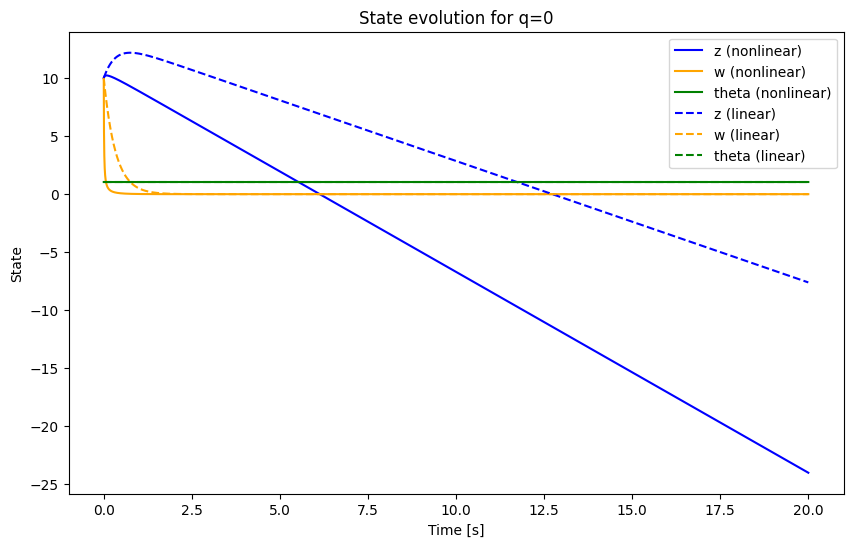

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

vd = 1
d1 = -3
d2 = -12
m_traco = 0.9
zd = 1

def d_dt(x, t, u):
    z = x[0] + zd
    w = x[1]
    theta = x[2]
    q = 0
    return [-vd*np.tan(theta) + w*1/np.cos(theta), d1*w + d2*w*abs(w) + m_traco*(vd/np.cos(theta) - w*np.tan(theta))*q, q]

def linear_d_dt(x, t, u):
    A = np.array([[0, 1, -vd], [0, d1, 0], [0, 0, 0]])
    return np.dot(A, x)

t = np.linspace(0, 20, 20000)

# Initial Conditions
x0 = [10, 10, np.pi/3]
u = 0

# Simulate the nonlinear system
x_nonlinear = odeint(d_dt, x0, t, args=(u,))

# Simulate the linear system
x_linear = odeint(linear_d_dt, x0, t, args=(u,))

# Plot the results
plt.figure(figsize=(10, 6))

# Nonlinear system
plt.plot(t, x_nonlinear[:,0], color='blue', label='z (nonlinear)')
plt.plot(t, x_nonlinear[:,1], color='orange', label='w (nonlinear)')
plt.plot(t, x_nonlinear[:,2], color='green', label='theta (nonlinear)')

# Linear system
plt.plot(t, x_linear[:,0], '--', color='blue', label='z (linear)')
plt.plot(t, x_linear[:,1], '--', color='orange', label='w (linear)')
plt.plot(t, x_linear[:,2], '--', color='green', label='theta (linear)')

plt.legend(loc='upper right')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('State evolution for q=0')
plt.show()

**1.5**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, $q$ as input and assume that $w=0$.

Prove that the origin of the closed-loop system with control law
\begin{equation}
q = k_1 (z-z_d) - k_2 \theta \tag{1}
\end{equation}
with positive gains $k_1$ and $k_2$ (and $v_d>0$) is asymptotically stable. \\
Use the Lyapunov function
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
\end{equation}


$\bf{1.5 : Answer}$

Because the $\dot z$ is given by:

$$
\dot z = - v_d \tan\theta + \frac{1}{\cos\theta}w
$$

and $\dot\theta$ is given by:

$$
\dot\theta = q
$$

And $w=0$ and $z_d = 1$ then the closed-loop system with control law $q = k_1 (z-z_d) - k_2 \theta$ is:

$$
\dot{\tilde z} = - v_d \tan\theta
$$

$$
\dot{\theta} = k_1 \tilde z - k_2 \theta
$$

The Lyapunov function is:

$$
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
$$

Taking the derivative of the Lyapunov function:

$$
\dot{V}(\tilde z, \theta) = \frac{k_1}{v_d}\tilde z \dot{\tilde z} + \tan(\theta)
$$

Substituting the values of $\dot{\tilde z}$ and $\dot{\theta}$:

$$
\dot{V}(\tilde z, \theta) = \frac{k_1}{v_d}\tilde z (- v_d \tan\theta) + \tan(\theta)
$$

$$
\dot{V}(\tilde z, \theta) = -k_1 \tilde z \tan\theta + \tan(\theta)
$$

We can conclude that system is asymptotically stable because:

$$
\begin{equation}
V(0, 0) = \frac{k_1}{2 v_d}0^2+\int_0^0 \tan(\phi)d\phi = 0
\end{equation}
$$

and:

$$
\begin{equation}
\dot V(\tilde z, \theta) = -k_1 \tilde z \tan\theta + \tan(\theta)
\end{equation}
$$

In the origin $\tilde z = 0$ and $\theta = 0$ we have:

$$
\begin{equation}
\dot V(0, 0) = -k_1 \cdot 0 \cdot \tan (0) + \tan (0) = 0
\end{equation}
$$

We can conclude that the system is asymptotically stable at the origin.

**1.6**
For the above item, confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $k_1=k_2=1$.

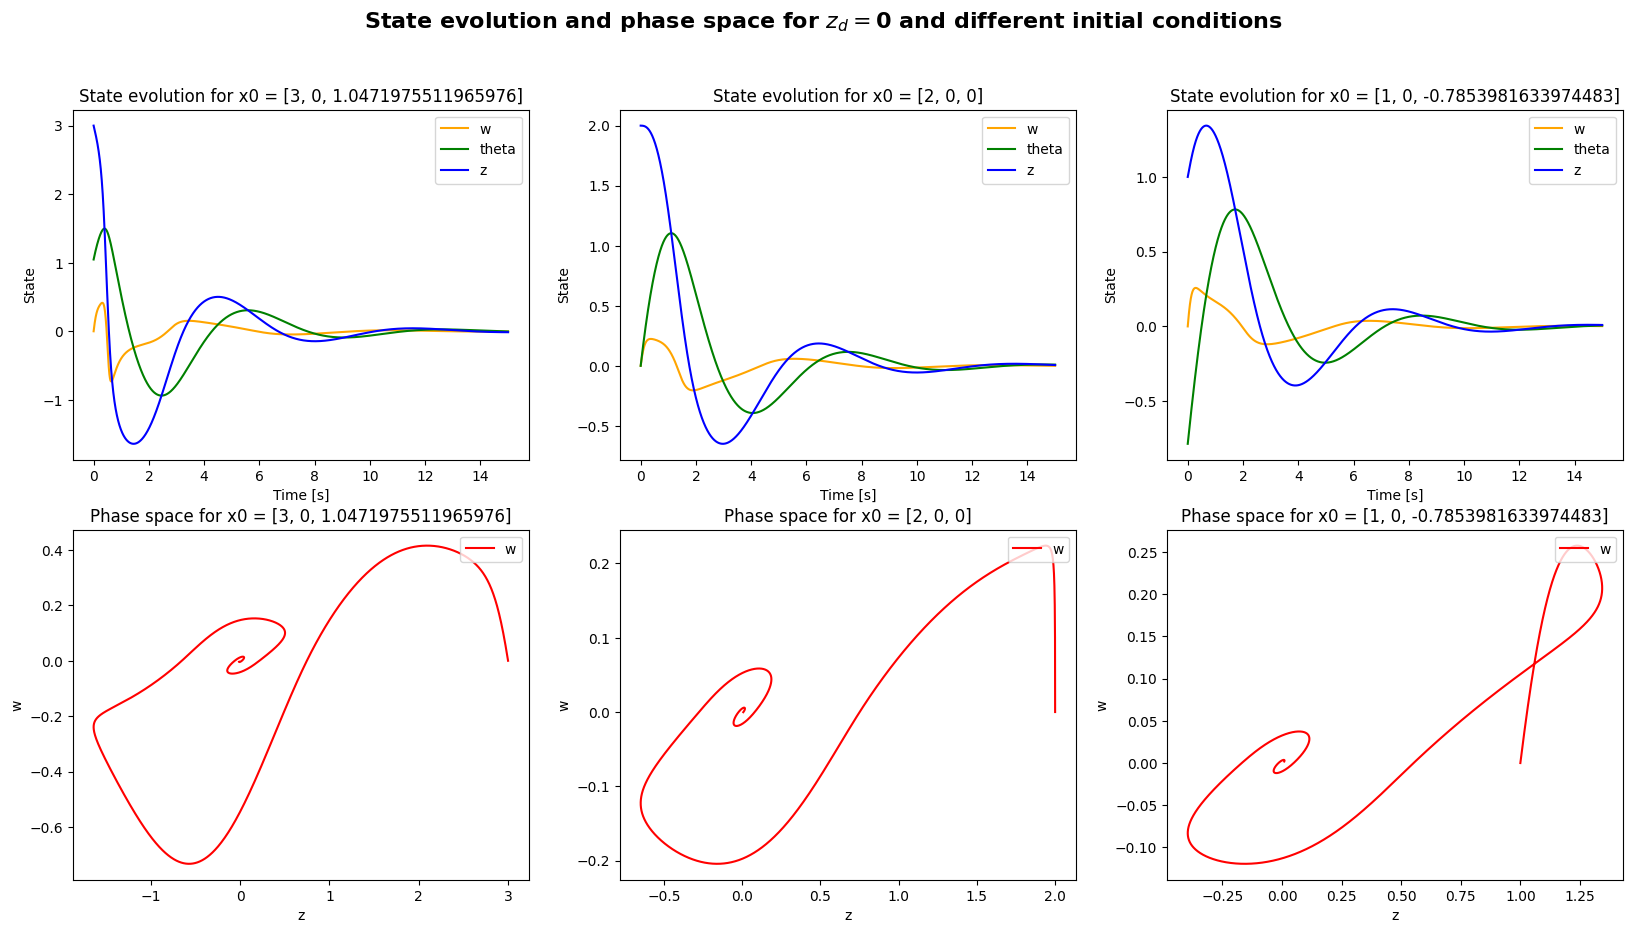

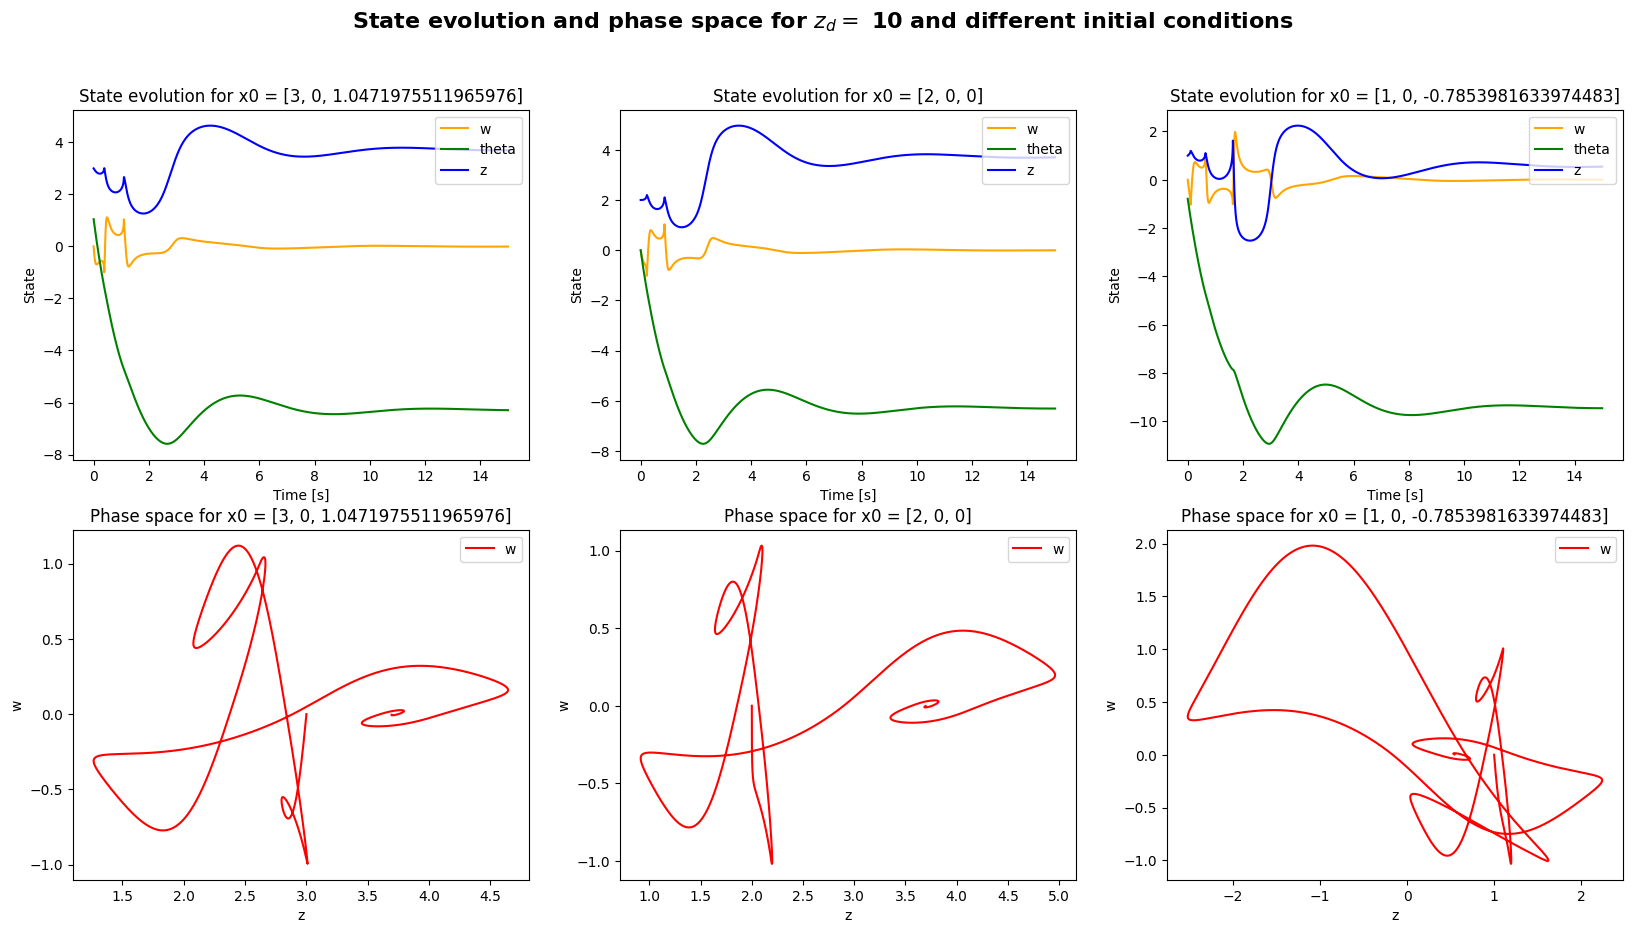

In [66]:

# Variables
k1, k2 = 1, 1
t = np.linspace(0, 15, 20000)
x0_1 = [3, 0, np.pi/3]
x0_2 = [2, 0, 0]
x0_3 = [1, 0, -np.pi/4]
zd = 0

# Nonlinear system
def d_dt(x, t, u):
	z_tilde = x[0] - zd
	theta = x[2]
	w = x[1]
	q = k1*z_tilde - k2*theta
	return [-vd*np.tan(theta) + w*1/np.cos(theta), d1*w + d2*w*abs(w) + m_traco*(vd/np.cos(theta) - w*np.tan(theta))*q, q]

# plot the time results and phase space for different initial conditions in 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

fig.suptitle('State evolution and phase space for $z_d = $' + str(zd) + ' and different initial conditions', fontsize=16, fontweight='bold')

# Initial Conditions
x0 = [x0_1, x0_2, x0_3]

for i in range(3):
	x_nonlinear = odeint(d_dt, x0[i], t, args=(u,))
	axs[0, i].plot(t, x_nonlinear[:,1], color='orange', label='w')
	axs[0, i].plot(t, x_nonlinear[:,2], color='green', label='theta')
	axs[0, i].plot(t, x_nonlinear[:,0], color='blue', label='z')
	axs[0, i].set_xlabel('Time [s]')
	axs[0, i].set_ylabel('State')
	axs[0, i].set_title('State evolution for x0 = ' + str(x0[i]))
	axs[0, i].legend(loc='upper right')

for i in range(3):
	x_nonlinear = odeint(d_dt, x0[i], t, args=(u,))
	axs[1, i].plot(x_nonlinear[:,0], x_nonlinear[:,1], color='red', label='w')
	axs[1, i].set_xlabel('z')
	axs[1, i].set_ylabel('w')
	axs[1, i].set_title('Phase space for x0 = ' + str(x0[i]))
	axs[1, i].legend(loc='upper right')

plt.show()


# Variables
zd = 10
t = np.linspace(0, 15, 20000)
x0_1 = [3, 0, np.pi/3]
x0_2 = [2, 0, 0]
x0_3 = [1, 0, -np.pi/4]

# plot the time results and phase space for different initial conditions in 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

fig.suptitle('State evolution and phase space for $z_d =$ ' + str(zd) + ' and different initial conditions', fontsize=16, fontweight='bold')

# Initial Conditions
x0 = [x0_1, x0_2, x0_3]

for i in range(3):
	x_nonlinear = odeint(d_dt, x0[i], t, args=(u,))
	axs[0, i].plot(t, x_nonlinear[:,1], color='orange', label='w')
	axs[0, i].plot(t, x_nonlinear[:,2], color='green', label='theta')
	axs[0, i].plot(t, x_nonlinear[:,0], color='blue', label='z')
	axs[0, i].set_xlabel('Time [s]')
	axs[0, i].set_ylabel('State')
	axs[0, i].set_title('State evolution for x0 = ' + str(x0[i]))
	axs[0, i].legend(loc='upper right')

for i in range(3):
	x_nonlinear = odeint(d_dt, x0[i], t, args=(u,))
	axs[1, i].plot(x_nonlinear[:,0], x_nonlinear[:,1], color='red', label='w')
	axs[1, i].set_xlabel('z')
	axs[1, i].set_ylabel('w')
	axs[1, i].set_title('Phase space for x0 = ' + str(x0[i]))
	axs[1, i].legend(loc='upper right')

plt.show()

**1.7**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the control law (1).
Plot the **time-evolution** of the state  for different initial conditions.

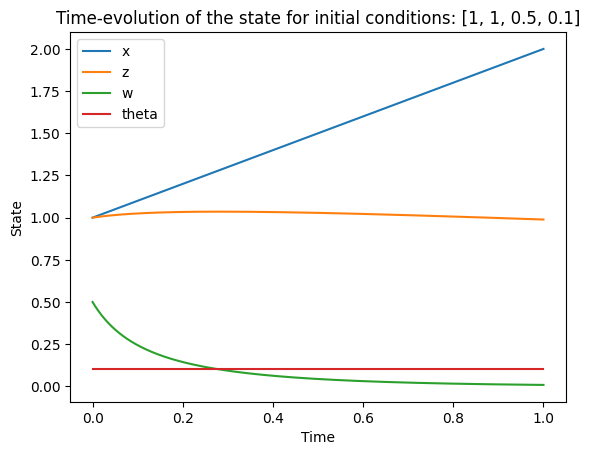

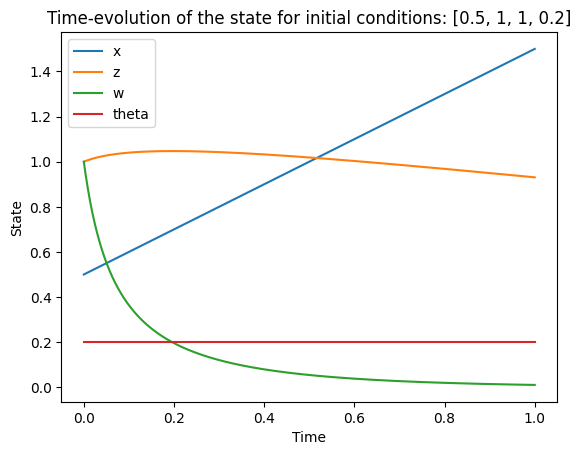

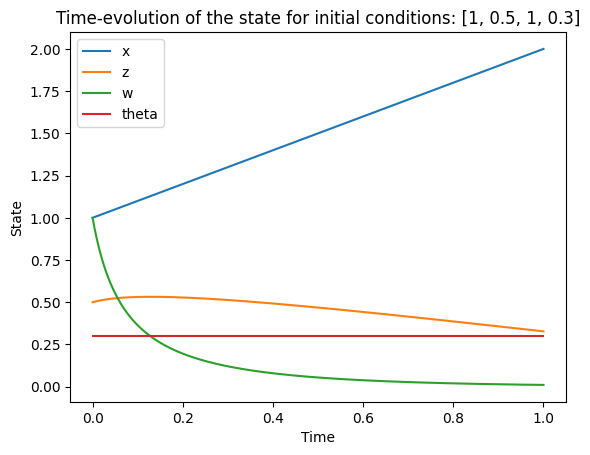

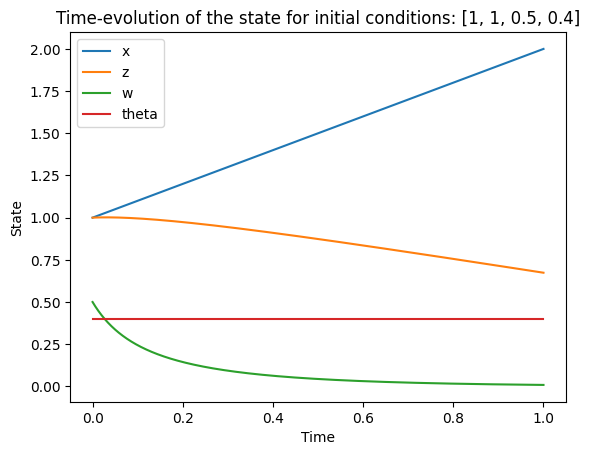

In [61]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the AUV model and control law
def auv_model(state, t):
    x, z, w, theta = state
    v_d = 1 
    d_1 = -3  
    d_2 = -12  
    dxdt = v_d
    dzdt = -v_d * np.tan(theta) + w / np.cos(theta)
    dwdt = d_1 * w + d_2 * w * abs(w)
    dthetadt = 0  # assuming theta is constant
    return [dxdt, dzdt, dwdt, dthetadt]

# Define the time points where the solution is computed
t = np.linspace(0, 1, 1000)

# Define different initial conditions
initial_conditions = [[1, 1, 0.5, 0.1], [0.5, 1, 1, 0.2], [1, 0.5, 1, 0.3], [1, 1, 0.5, 0.4]]

# For each set of initial conditions, solve the system and plot the results
for ic in initial_conditions:
    solution = odeint(auv_model, ic, t)
    plt.figure()
    plt.plot(t, solution[:, 0], label='x')
    plt.plot(t, solution[:, 1], label='z')
    plt.plot(t, solution[:, 2], label='w')
    plt.plot(t, solution[:, 3], label='theta')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title(f'Time-evolution of the state for initial conditions: {ic}')